# Project: Predict Income

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Load the Data Set

In [2]:
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")

df = pd.read_csv(adultDataSet_filename)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Define Your ML Problem

I have chosen the Census Data Set (censusData.csv). I will be predicting income, and the label is the income_binary column. This is a supervised learning problem because every example has a label. It is a binary classification problem because there are two values for income (<=50K and >50K). My features are workclass, education-num, marital-status, occupation, age, race, sex_selfID, capital-gain, capital-loss, hours-per-week, education, relationship, fnlwgt, and native-country. This is an important problem because a company may need to predict the income range of customers. A company may be looking to market a luxury product only to people in a certain income range. Alternatively, a nonprofit may be looking to advertise their services only to people in a low income range, and they may need to predict someone's income in order to offer their services appropriately.

## Part 3: Understand Your Data

I will use some basic tools to get a general idea of what is going on in my data as a whole.

In [3]:
print(df.shape)
print(df.dtypes)
df.head(10)

(32561, 15)
age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
6,49.0,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16.0,Jamaica,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,45.0,United-States,>50K
8,31.0,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50.0,United-States,>50K
9,42.0,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,5178,0,40.0,United-States,>50K


From the above analysis, I can see that the marital-status, occupation, race, sex_selfID, and native-country columns need to be one-hot encoded. The income_binary column, the label, must be transformed into numerical data as well. Already, I can also see some redundant or useless information. Education and education-num communicate the same information, fnlwgt appears irrelevant to this problem, and relationship seems to provide the same information as marital-status.

Next, I will look for missing values.

In [4]:
nan_count = np.sum(df.isnull(), axis=0)
print(nan_count)

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


From this, I can see that age and hours-per-week should have numerical means filled into their null values. Native-country, occupation, and workclass should all have some text data (ex. 'Unknown') filled into their null values. Occupation and workclass each have many null values.

Now, I will look at the correlation between the features and the label column, income_binary.

In [5]:
#making label numerical so that correlation will work
df['income_binary'] = [1 if i == '>50K' else 0 for i in df['income_binary']]

#correlation between features and label
corrs = df.corr()
print(corrs['income_binary'])

age               0.233638
fnlwgt           -0.009463
education-num     0.335154
capital-gain      0.347555
capital-loss      0.150526
hours-per-week    0.229523
income_binary     1.000000
Name: income_binary, dtype: float64


Per this analysis, fnlwgt provides little correlation with the label and can be removed. The text columns are not yet included in this analysis, and it may be worth looking at again in the data preparation step.

Next, I will consider the number of unique values in each object column.

In [6]:
#unique values in object columns
strings = pd.Series(df.select_dtypes(include=['object']).columns)
num_unique = pd.Series(data=[len(df[i].unique()) for i in strings], index=strings)
print(num_unique)

workclass          9
education         16
marital-status     7
occupation        15
relationship       6
race               5
sex_selfID         2
native-country    42
dtype: int64


From this, marital-status, race, and sex_selfID can be simply one-hot encoded. For columns with more unique values, I might include only the top 5 or 10 values, such as in native-country, occupation, or workclass.

Next, I will look for class imbalance in my label column (income_binary).

In [7]:
print(df['income_binary'].mean())
print(df['income_binary'].value_counts()[0])
print(df['income_binary'].value_counts()[1])

0.2408095574460244
24720
7841


From this, I can see that the data is skewed towards the value '0', representing income lower than \\$50,000. This makes sense, since the median income in the U.S. is less than \\$50,000. Also, there is still enough data points with positive label values for a machine learning model to learn some nuances from the data.

In this same vein, I will now look at statistics for each column of the data.

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income_binary
count,32399.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32236.000000,32561.000000
mean,38.589216,1.897784e+05,10.080679,615.907773,87.303830,40.450428,0.240810
std,13.647862,1.055500e+05,2.572720,2420.191974,402.960219,12.353748,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,14084.000000,4356.000000,99.000000,1.000000


The capital-gain and capital-loss columns have high standard deviation and likely are mostly zeroes. They will need to be scaled. The age column also has a somewhat high standard deviation, and should be scaled. The hours-per-week column should also be scaled. Removing outliers from capital-gain and capital-loss would remove most significant data points (since all the data is clustered towards 0, remvoing outliers would remove nonzero data points). It's possible that this column should not be trusted. Age could be winsorized, especially at the higher end of the range. There seems to be outliers, since the max is far from the mean, the standard deviation is high, and the max is far from the 75th percentile. Hours-per-week could also be winsorized for the same reasons.

## Part 4: Define My Project Plan

After inspecting the data, I will remove the fnlwgt, relationship, and education columns. Relationship and education are better represented by marital-status and education-num. Fnlwgt has no predictive value. My new feature list is age, education-num, caital-gain, capital-loss, hours-hper-week, workclass, marital-status, occupation, race, sex_selfID, and native-country.

To prepare my data, I will replace null values with mean values in the age and hours-per-week columns. I will one-hot encode the sex_selfID, marital-status, and race columns. I will one-hot encode the top several most common values for native-country, workclass and occupation. I will replace null values with values like "Unknown" in the categorical features. I will remove fnlwgt because it does not correlate with the label. I will remove the education column because the education-num column will suffice, and I will remove relationship because the marital-status column will suffice. I will winsorize education-num and age to remove outliers from both columns. I will winsorize age and hours-per-week to take care of outliers.

I will evaluate 3 types of models: logistic regression, random forest, and neural network. For each model, I will attempt to optimize the hyperparameters by iteratively training models with different hyperparameters. I will ultimately select the model that has the greatest accuracy score, taking into consideration time and resources required to train each model. I will use accuracy score as the metric across models to compare them. I will compute other metrics on individual models as is appropriate, but I will compare the accuracy scores, since that metric will be constant across models.

## Part 5: Implement Your Project Plan

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import tensorflow.keras as keras
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages

2024-08-05 14:28:06.486144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-05 14:28:06.486171: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Data Preparation
In this cell, I drop a few columns that add little additional value to the model. Education and relationship are very similar to two other columns, and fnlwgt correlates poorly with the label.

In [10]:
#dropping columns with little additional value
df.drop(columns=['fnlwgt', 'education', 'relationship'], inplace=True)

In this cell, I have filled in null values in the two numerical columns with the means of the columns. In the object columns, I fill in the null values with 'Unknown'.

In [11]:
#fill in null values with means
df['hours-per-week'].fillna(value=df['hours-per-week'].mean(), inplace=True)
df['age'].fillna(value=df['age'].mean(), inplace=True)

#filling null values in object columns
df['workclass'].fillna(value='Unknown', inplace=True)
df['occupation'].fillna(value='Unknown', inplace=True)
df['native-country'].fillna(value='Unknown', inplace=True)

In this cell, I winsorize the outliers from the education-num and age columns.

In [12]:
df['hours-per-week'] = stats.mstats.winsorize(df['hours-per-week'], limits=[0.01, 0.01])
df['age'] = stats.mstats.winsorize(df['age'], limits=[0, 0.01])

In this cell, I one-hot encode the categorical features race, sex_selfID, and marital-status.

In [13]:
#one-hot encoding
df_race = pd.get_dummies(data=df['race'])
df_sex_selfID = pd.get_dummies(data=df['sex_selfID'])
df_marital_status = pd.get_dummies(data=df['marital-status'])
df = pd.concat([df, df_race, df_sex_selfID, df_marital_status], axis=1)
df.drop(columns=['race', 'sex_selfID', 'marital-status'], axis=1, inplace=True)

In this cell, I one-hot encode the top 10 features in native-country and the top 5 occupations and workclasses.

In [14]:
#one-hot encoding top features from native-country, occupation & workclass
value_count = pd.value_counts(df['native-country'])
value_count = value_count.head(10)
top_10 = value_count.index
for i in top_10:
    df['native-country_'+i] = np.where(df['native-country']==i, 1, 0)

value_count = pd.value_counts(df['occupation'])
value_count = value_count.head(5)
top_5 = value_count.index
for i in top_5:
    df['occupation_'+i] = np.where(df['occupation']==i, 1, 0)

value_count = pd.value_counts(df['workclass'])
value_count = value_count.head(5)
top_5 = value_count.index
for i in top_5:
    df['workclass_'+i] = np.where(df['workclass']==i, 1, 0)

df.drop(columns=['native-country', 'occupation', 'workclass'], inplace=True)

In the following cells, I inspect my transformed data.

In [15]:
df.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,Amer-Indian-Inuit,Asian-Pac-Islander,Black,Other,...,occupation_Prof-specialty,occupation_Craft-repair,occupation_Exec-managerial,occupation_Adm-clerical,occupation_Sales,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_Unknown,workclass_State-gov
0,39.0,13,2174,0,40.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50.0,13,0,0,13.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,38.0,9,0,0,40.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,53.0,7,0,0,40.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,28.0,13,0,0,40.0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


In [16]:
df.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_binary', 'Amer-Indian-Inuit',
       'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Female', 'Non-Female',
       'Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed',
       'native-country_United-States', 'native-country_Mexico',
       'native-country_Unknown', 'native-country_Philippines',
       'native-country_Germany', 'native-country_Canada',
       'native-country_Puerto-Rico', 'native-country_El-Salvador',
       'native-country_India', 'native-country_Cuba',
       'occupation_Prof-specialty', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Adm-clerical',
       'occupation_Sales', 'workclass_Private', 'workclass_Self-emp-not-inc',
       'workclass_Local-gov', 'workclass_Unknown', 'workclass_State-gov'],
      dtype='object')

From the above cell, I see that one of the top 5 workclass values was 'Unknown', or null values. I will remove this column, since it doesn't make sense to use a feature that only represents null values.

In [17]:
df.drop(columns=['workclass_Unknown'], inplace=True)

In [18]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income_binary,Amer-Indian-Inuit,Asian-Pac-Islander,Black,Other,...,native-country_Cuba,occupation_Prof-specialty,occupation_Craft-repair,occupation_Exec-managerial,occupation_Adm-clerical,occupation_Sales,workclass_Private,workclass_Self-emp-not-inc,workclass_Local-gov,workclass_State-gov
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.535900,10.080679,615.907773,87.303830,40.402948,0.240810,0.009551,0.031909,0.095943,0.008323,...,0.002918,0.127146,0.125887,0.124873,0.115783,0.112097,0.697030,0.078038,0.064279,0.039864
std,13.454173,2.572720,2420.191974,402.960219,11.883925,0.427581,0.097264,0.175761,0.294518,0.090851,...,0.053937,0.333142,0.331727,0.330580,0.319969,0.315491,0.459549,0.268236,0.245254,0.195642
min,17.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,74.000000,16.000000,14084.000000,4356.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df.corr()['income_binary']

age                             0.236569
education-num                   0.335154
capital-gain                    0.347555
capital-loss                    0.150526
hours-per-week                  0.234536
income_binary                   1.000000
Amer-Indian-Inuit              -0.028721
Asian-Pac-Islander              0.010543
Black                          -0.089089
Other                          -0.031830
White                           0.085224
Female                         -0.215980
Non-Female                      0.215980
Divorced                       -0.126995
Married-AF-spouse               0.012061
Married-civ-spouse              0.444696
Married-spouse-absent          -0.042532
Never-married                  -0.318440
Separated                      -0.074386
Widowed                        -0.064381
native-country_United-States    0.034470
native-country_Mexico          -0.062901
native-country_Unknown          0.003038
native-country_Philippines      0.012306
native-country_G

From this, I can see that education-num, capital-gain, age, sex_selfID, and hours-per-week correlate relatively strongly with the lable. Many of the one-hot encoded columns don't, though some do (Married-civ-spouse, for example).

# Preparing Training & Testing Data Sets
I will use 30% of the data as the test data set. I scale the feature data, since I am testing a neural network and a logistic regression model. 

In [20]:
scaler = StandardScaler()
X = df.drop(columns=['income_binary'])
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index = X.index)
y = df['income_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1234)
print(X_train.shape)
print(X_test.shape)

(22792, 38)
(9769, 38)


# Testing Models

## Logistic Regression
First, I will test logistic regression, using different values for the hyperparameter c.

In [21]:
cs = [10**i for i in range(-10,10)]
l_loss_values = []
acc_scores = []
for i in cs:
    model = LogisticRegression(C=i)
    model.fit(X_train, y_train)
    proba_predictions = model.predict_proba(X_test)
    l_loss = log_loss(y_test, proba_predictions)
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    l_loss_values.append(l_loss)
    acc_scores.append(acc_score)
    print('C: '+str(i)+'\nLog loss: '+str(l_loss)+' Accuracy: '+str(acc_score))

C: 1e-10
Log loss: 0.5459281023001031 Accuracy: 0.7645613675913604
C: 1e-09
Log loss: 0.5459223359052181 Accuracy: 0.7645613675913604
C: 1e-08
Log loss: 0.5458894498472612 Accuracy: 0.7645613675913604
C: 1e-07
Log loss: 0.5455611285488203 Accuracy: 0.7645613675913604
C: 1e-06
Log loss: 0.5423361134638495 Accuracy: 0.7645613675913604
C: 1e-05
Log loss: 0.5148078122285121 Accuracy: 0.7645613675913604
C: 0.0001
Log loss: 0.4144306941923267 Accuracy: 0.7994677039615109
C: 0.001
Log loss: 0.345454576412474 Accuracy: 0.8438939502507933
C: 0.01
Log loss: 0.3364330790532116 Accuracy: 0.8456341488381616
C: 0.1
Log loss: 0.33665940658466664 Accuracy: 0.8452246903470161
C: 1
Log loss: 0.33672603994323513 Accuracy: 0.8452246903470161
C: 10
Log loss: 0.33673326175559376 Accuracy: 0.8452246903470161
C: 100
Log loss: 0.3367339896723623 Accuracy: 0.8452246903470161
C: 1000
Log loss: 0.3367340625215494 Accuracy: 0.8452246903470161
C: 10000
Log loss: 0.33673406980704335 Accuracy: 0.8452246903470161
C: 1

Text(0, 0.5, 'Log Loss')

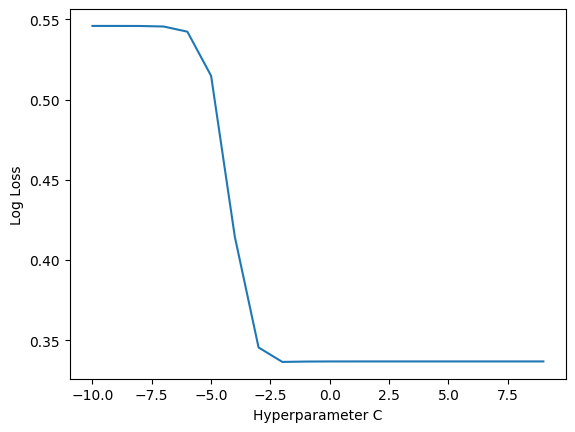

In [22]:
cs_log10 = np.log10(cs)
sns.lineplot(x=cs_log10, y=l_loss_values)
plt.xlabel('Hyperparameter C')
plt.ylabel('Log Loss')

From the above graph, log loss is minimized at a value around 0.33, when C is greater than or equal to 0.01.

Text(0, 0.5, 'Accuracy scores')

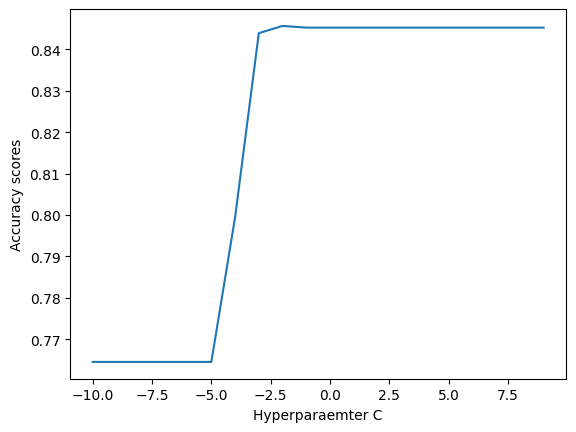

In [23]:
sns.lineplot(x=cs_log10, y=acc_scores)
plt.xlabel('Hyperparaemter C')
plt.ylabel('Accuracy scores')

From the above graph, accuracy is maximized at a value around 0.844, when C is greater than or equal to 0.01. Thus the optimal value for C is 0.01, to minimize loss and maximize accuracy.

## Random Forest
Next, I will test Random Forest, an ensemble model, with varying numbers of trees.

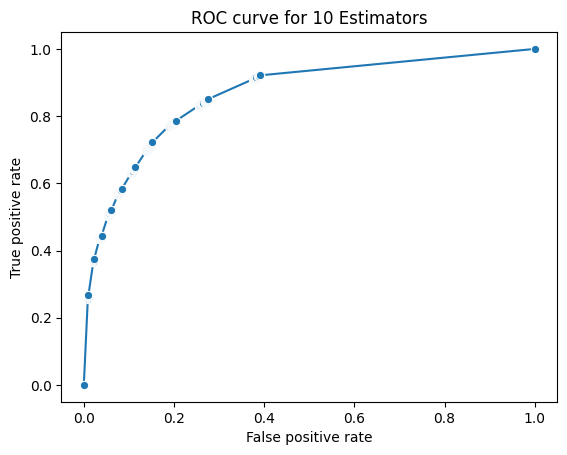

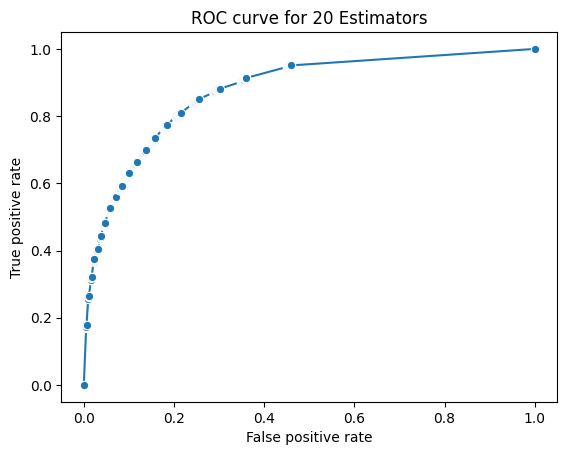

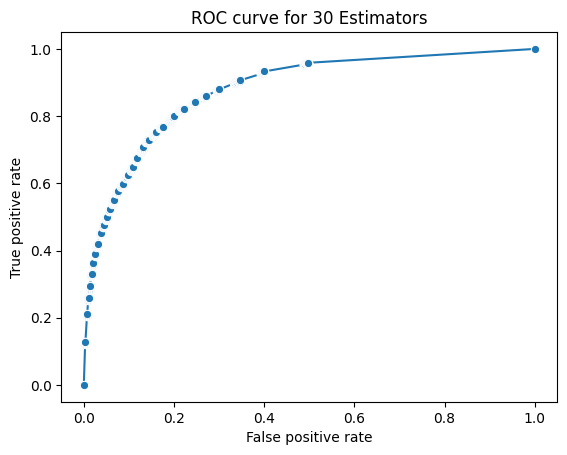

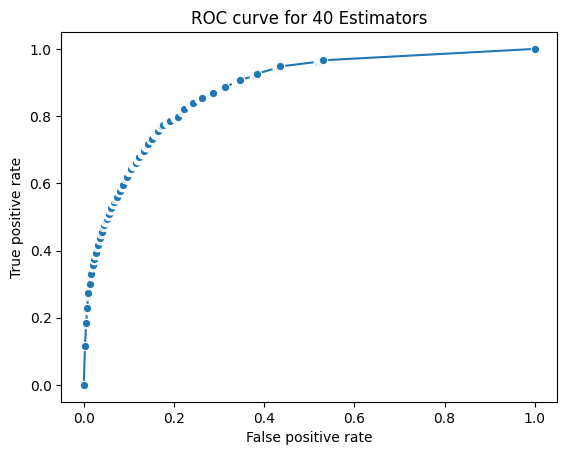

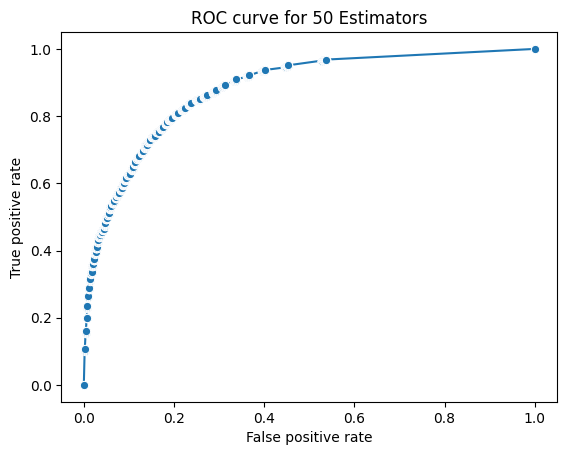

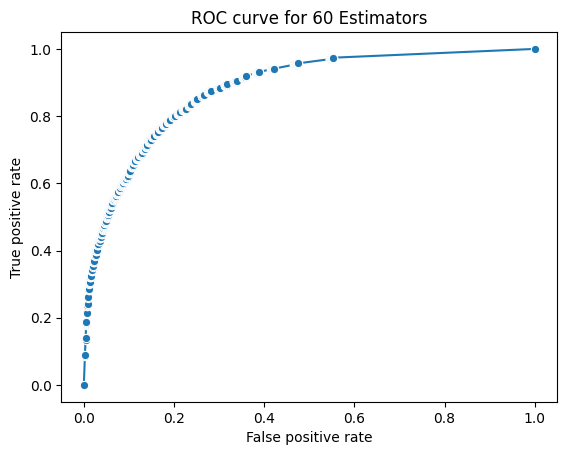

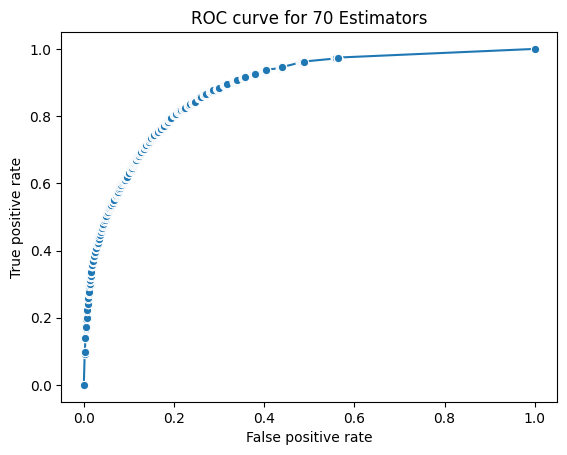

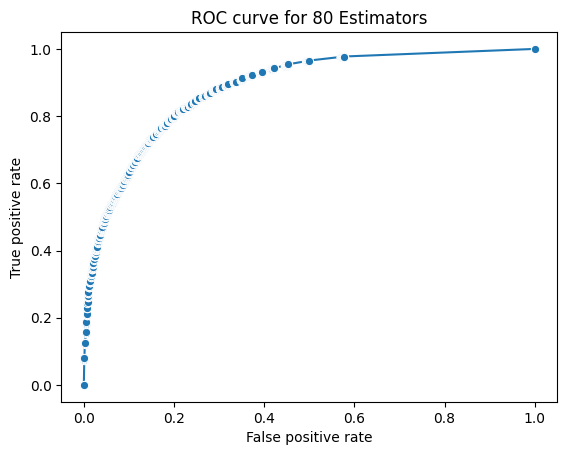

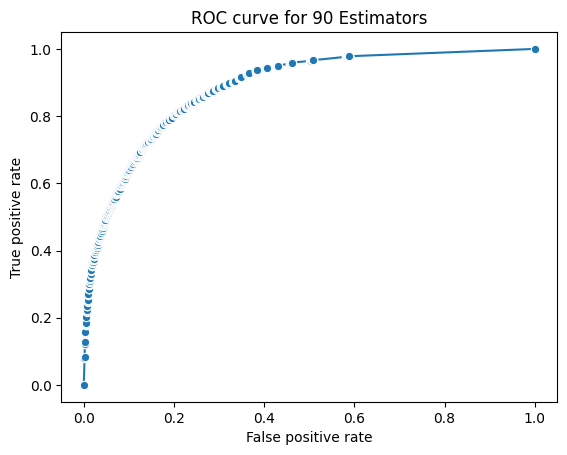

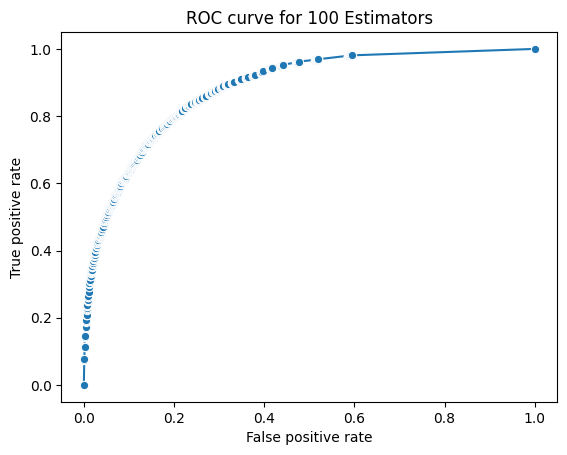

In [30]:
n_estimators_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
aucs = []
acc_scores = []
for i in n_estimators_list:
    # create model
    rf_model = RandomForestClassifier(criterion='entropy', n_estimators=i)
    rf_model.fit(X_train, y_train)

    #accuracy score (for model comparison)
    preds = rf_model.predict(X_test)
    acc_score = accuracy_score(y_test, preds)
    acc_scores.append(acc_score)

    #predictions (for graphing)
    predict_probas = rf_model.predict_proba(X_test)
    predictions = list(predict_probas[:, -1])

    #ROC curve & AUC values
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    sns.lineplot(x=fpr, y=tpr, marker = 'o')
    plt.title("ROC curve for "+str(i)+" Estimators")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()
    AUC = auc(fpr, tpr)
    aucs.append(AUC)

The curves above show the performance of the classifier at different thresholds. As the graph looks more like a right angle, the classifier performs better. By this metric, the curve of 90 or 100 estimators looks most accurate. Next, I'll consider some numerical evaluations of model performance.

In [31]:
for i in range(len(aucs)):
    print(str(n_estimators_list[i])+' Estimators: '+str(aucs[i]))

10 Estimators: 0.8653373945641987
20 Estimators: 0.8753744753677519
30 Estimators: 0.8782294061832385
40 Estimators: 0.8789362408098402
50 Estimators: 0.8805151437536018
60 Estimators: 0.8815650194717878
70 Estimators: 0.8824491667006235
80 Estimators: 0.8829395414088376
90 Estimators: 0.8844398586621806
100 Estimators: 0.8836007963349962


The random forest with 90 estimators has the highest AUC value, indicating that it performs the best.

In [32]:
for i in range(len(acc_scores)):
    print(str(n_estimators_list[i])+' Estimators: '+str(acc_scores[i]))

10 Estimators: 0.8376497082608251
20 Estimators: 0.8400040945849114
30 Estimators: 0.8388780837342614
40 Estimators: 0.8375473436380387
50 Estimators: 0.8376497082608251
60 Estimators: 0.839594636093766
70 Estimators: 0.8405159176988433
80 Estimators: 0.8389804483570478
90 Estimators: 0.8400040945849114
100 Estimators: 0.8430750332685024


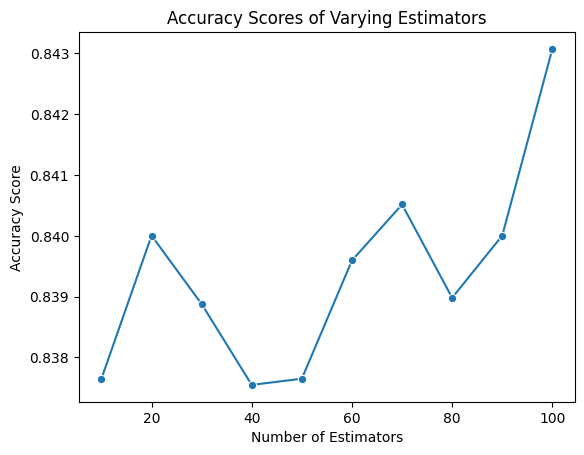

In [33]:
sns.lineplot(x=n_estimators_list, y=acc_scores, marker = 'o')
plt.title("Accuracy Scores of Varying Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Score")
plt.show()

From the above graph, accuracy peaks at 100 estimators with a value of about 0.843, which is slightly lower than the peak accuracy of logistic regression. This is the same metric used to evaluate logistic regression. Other metrics show the Random Forest with 90 estimators performing better, so it depends on the metric. Accuracy score is being used for model comparison. In previous iterations of the code cells above, the classifier with 80 estimators has been most accurate. Consistently, 80 and 100 estimators are most accurate.

## Neural Network
My third model type will be Neural Network.

In [28]:
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=False)
# 1. Create model object:
nn_model = keras.Sequential()

# 2. Create the input layer and add it to the model object: 
# Create input layer:
input_shape = X_train.shape[1]
input_layer = keras.layers.InputLayer(input_shape)
# Add input_layer to the model object:
nn_model.add(input_layer)

# 3. Create the first hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_1 = keras.layers.Dense(units=128, activation = 'relu')
# Add hidden_layer_1 to the model object:
nn_model.add(hidden_layer_1)
dropout_1 = keras.layers.Dropout(rate=0.1)
nn_model.add(dropout_1)

# 4. Create the second hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_2 = keras.layers.Dense(units=64, activation = 'relu')
# Add hidden_layer_2 to the model object:
nn_model.add(hidden_layer_2)

dropout_2 = keras.layers.Dropout(rate=0.1)
nn_model.add(dropout_2)
# 5. Create the third hidden layer and add it to the model object:
# Create hidden layer:
hidden_layer_3 = keras.layers.Dense(units=32, activation='relu')
# Add hidden_layer_3 to the model object:
nn_model.add(hidden_layer_3)

dropout_3 = keras.layers.Dropout(rate=0.1)
nn_model.add(dropout_3)
hidden_layer_4 = keras.layers.Dense(units=16, activation='relu')
# Add hidden_layer_3 to the model object:
nn_model.add(hidden_layer_4)

# 6. Create the output layer and add it to the model object:
# Create output layer:
output_layer = keras.layers.Dense(units=1, activation = 'sigmoid')
# Add output_layer to the model object:
nn_model.add(output_layer)


# Print summary of neural network model structure
nn_model.summary()

nn_model.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])

num_epochs = 130
history = nn_model.fit(X_train, y_train, epochs = num_epochs, verbose = 0, validation_split=0.2)

2024-08-05 14:28:56.420551: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-05 14:28:56.420573: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-05 14:28:56.420630: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-09a410c9558fbad65): /proc/driver/nvidia/version does not exist
2024-08-05 14:28:56.420810: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-05 14:28:56.540799: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               4992      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [29]:
preds = nn_model.predict(X_test)
print(preds)
preds = [1 if i>0.6 else 0 for i in preds]
print(accuracy_score(y_test, preds))

[[0.5842297 ]
 [0.4022544 ]
 [0.00122973]
 ...
 [1.        ]
 [0.09534228]
 [0.5160214 ]]
0.8399017299621251


From the above results, we see that the optimized neural network with 4 hidden layers and 3 dropout layers performs better than the optimized random forest on accuracy. The optimal threshold was found to be 0.6. However, the neural network takes a noticeably higher amount of time to train.

# Conclusion
Ultimately, any of the three models can perform the task to an acceptable level of accuracy (~84%). Logistic regression is a simple model that is easy to train and easy to understand, and it performed with the highest accuracy. Random forest has the benefit of multiple classifiers, but it is more costly to train. Neural networks can detect nonlinear relationships between features and the label, but they are very costly to train and difficult to explain to shareholders. The choice of which of the above models to use depends on a business' values: do they value an easy-to-explain, simple-to-train model? Or would they prefer a more complex model that can understand nonlinear relationships? The more complex model may be required if the data format or content changes. Feature selection could be performed more thoroughly by the company, and they may consider which features are more costly to upkeep. In this analysis, I found logistic regression to be the easiest to train with the highest accuracy (by 0.001, which is a very small difference). I would consider logistic regression due to its simplicity, or Random Forest due to its greater complexity but still low training time.